# Summer 2022 Data Science Intern Challenge 

**Question 1:** Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


**Question 2:** For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?


-------------

# Question One

## Part 1

The mean (average) value is sensitive to the presence of outliers, which can produce abnormal values. The large average order value (AOV) may therefore indicate the presence of outliers. The analysis below will aim to assess if this is true, after which a solution will be provided.

### Module Import

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### Data Import

In [3]:
df = pd.read_csv('shopify_data_science_challenge.csv')

### Data Exploration

In [9]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


**The dataset does not appear to have missing data points and consists of 64-bit integers and pandas object data types.**

In [8]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**The order amount has a large mean compared to the other features along with a large standard of deviation, indicating large data variability (i.e. points are further from mean).**

### Checking for Outliers

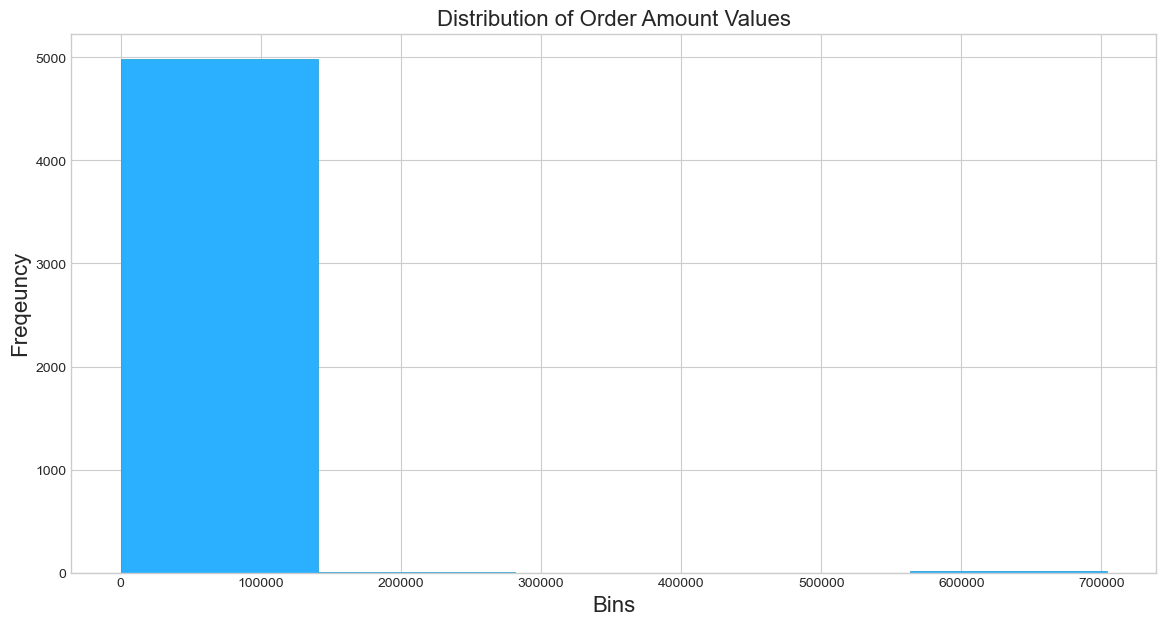

In [37]:
# Histogram to visualize data spread of order amount values:

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(df.order_amount, bins=5, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of Order Amount Values', fontsize=16) 
plt.xlabel('Bins', fontsize=16) 
plt.ylabel('Freqeuncy', fontsize=16) 
plt.show()

**Based on the spread of the order amount values in the histogram, it appears a few outliers are present around the 20 to 30k and 60k to 70k region. The large magnitude of these outliers will skew the average towards a large value, as is observed. We can confirm this by checking the frequency of the outliers below:**  

In [38]:
# Extract the Histogram Results as a pandas DataFrame:

bins, bin_edges = np.histogram(df.order_amount, bins = 5)
d = {'count': bins, 'edges': bin_edges[1:]}

df_spread = pd.DataFrame(d)
df_spread


,count,edges
0,4982,140872.0
1,1,281654.0
2,0,422436.0
3,0,563218.0
4,17,704000.0


**As shown in the dataframe above, there are 17 outliers within the 60k to 70k bin! The frequency and magnitude of these outliers is resulting in the deviations in the obtained average order value (AOV). To resolve s we can either remove the outliers from the dataset or utilize a metric that is less sensitive to outliers such as the median.** 

## Part 2

As mentioned above, I would report the median for the order amount as it is generally less sensitive to outliers. 

## Part 3

In [42]:
# Calculating the median:

print('The median of the order Amount is:',df.order_amount.median())

The median of the order Amount is: 284.0


# Question 2

## Part 1: How many orders were shipped by Speedy Express in total?

**SQL Query**

SELECT COUNT(ShipperID)

FROM [Orders]

WHERE ShipperID = 1;

**Answer: 54**

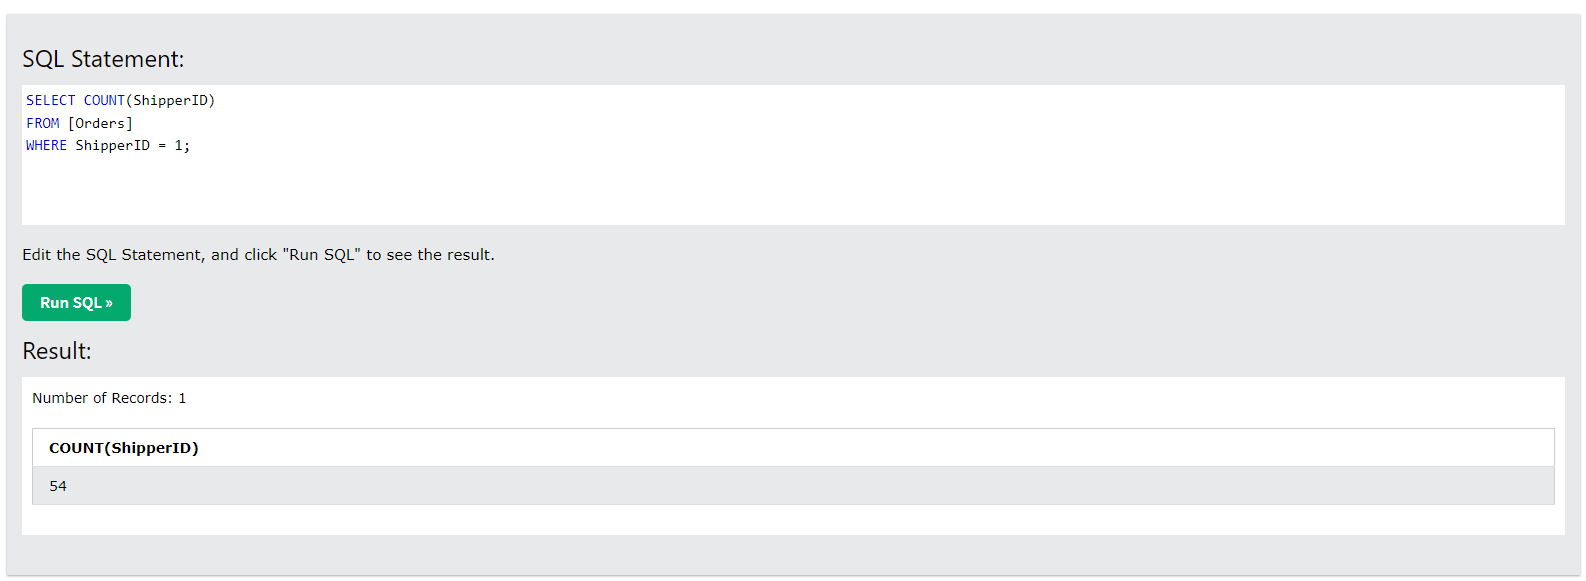

## Part 2: What is the last name of the employee with the most orders?

**SQL Query**

SELECT LastName

FROM Employees

WHERE EmployeeID IN (SELECT EmployeeID 

                     FROM Orders
                     
                     GROUP BY EmployeeID
                     
                     ORDER BY COUNT(EmployeeID) DESC LIMIT 1);


**Answer: Peacock**

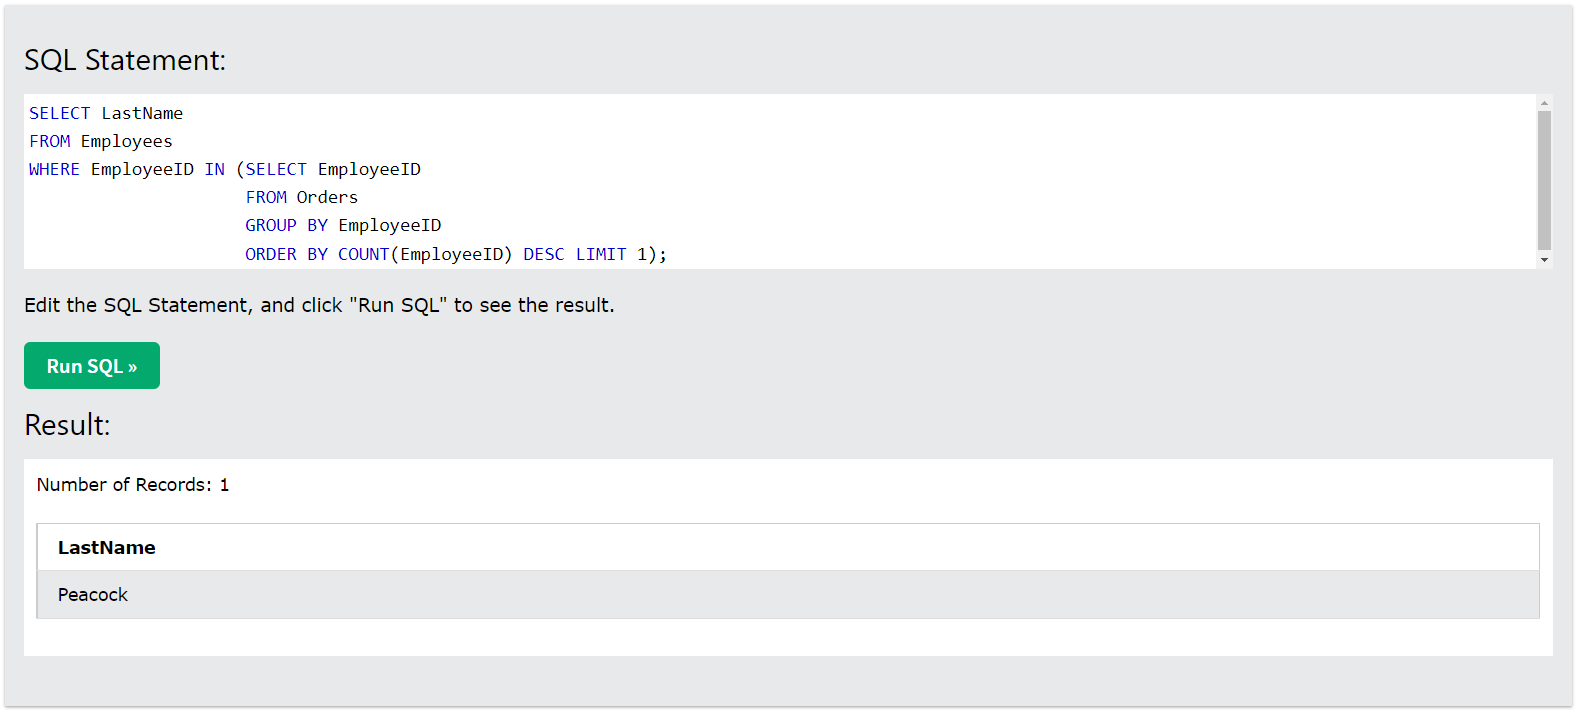

## Part 3: What product was ordered the most by customers in Germany?

**SQL Query:**

SELECT ProductName

FROM Products

WHERE ProductID IN (SELECT ProductID FROM OrderDetails

					WHERE OrderID in (SELECT OrderID FROM Orders
                    
				  	WHERE CustomerID IN (SELECT CustomerID From Customers WHERE Country='Germany'))
                    
					GROUP BY ProductID ORDER BY COUNT(ProductID) DESC LIMIT 1);
                    
**Answer: Gorgonzola Telino**

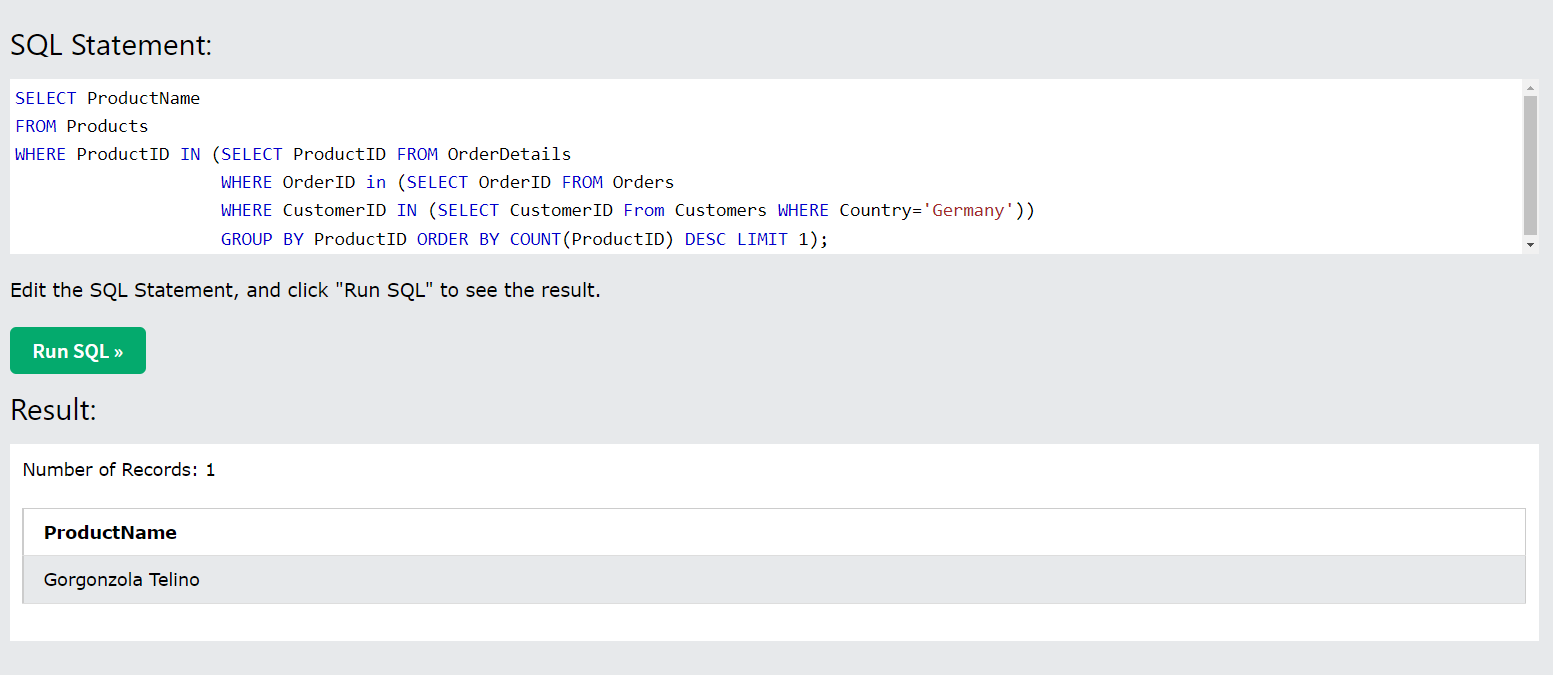